In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

In [3]:
cancer = load_breast_cancer()


In [4]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\AmroV\anaconda3\envs\amrxenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [7]:
y_pred = model.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104
ROC AUC Score: 0.9464461185718965


[[39  4]
 [ 1 70]]


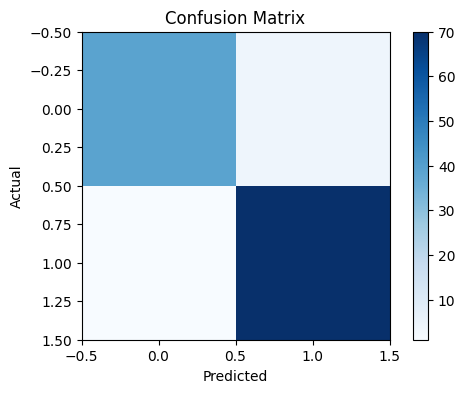

In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
plt.figure(figsize=(6,4))
plt.imshow(conf_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

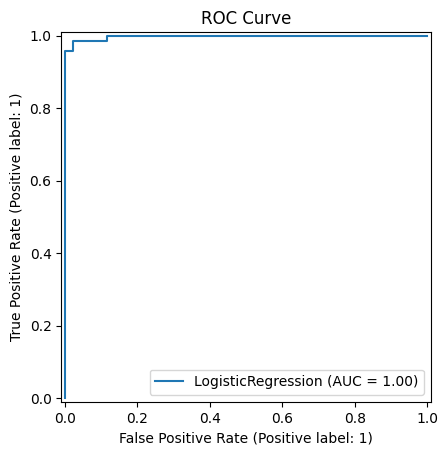

In [10]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()